### **Loading Libraries**

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### **Data Overview and Manipulation**

In [301]:
df_orig = pd.read_excel("data_final_project.xlsx") 
df_orig

,un_member,code,pro_rus_index,rus_aid_mean,bits,exp_share,imp_share,reg_type,dist_caps,comecon,dca,percap_gdp,org_member
0,Afghanistan,AFG,0.414286,1.775556,0,0.080393,0.004357,1,3368,1,0,508.788403,0
1,Albania,ALB,0.000000,0.085556,1,0.021221,0.005829,0,2064,1,0,5077.727518,0
2,Algeria,DZA,0.528571,0.005556,1,0.617429,0.009579,1,3341,0,0,4973.533440,0
3,Andorra,AND,0.014286,0.000000,0,0.001125,0.000079,0,2973,0,0,44124.694229,0
4,Angola,AGO,0.514286,0.703333,1,0.029179,0.001886,1,7536,1,0,3141.299493,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,"Venezuela, Bolivarian Republic of",VEN,0.828571,0.007778,1,0.131671,0.000836,1,9940,0,1,8932.777127,0
188,Viet Nam,VNM,0.714286,1.718889,1,0.324850,1.016279,1,6738,0,0,2823.548930,0
189,Yemen,YEM,0.357143,1.084444,1,0.051243,0.000086,1,4526,0,0,1010.983955,0
190,Zambia,ZMB,0.385714,3.767778,0,0.002343,0.004957,0,7976,0,0,1408.713170,0


In [302]:
# Converting GDP per capita from float to integer because goal is to measure it in whole $ 
df_orig['percap_gdp'] = df_orig['percap_gdp'].astype('int')

In [304]:
df_orig

,un_member,code,pro_rus_index,rus_aid_mean,bits,exp_share,imp_share,reg_type,dist_caps,comecon,dca,percap_gdp,org_member
0,Afghanistan,AFG,0.414286,1.775556,0,0.080393,0.004357,1,3368,1,0,508,0
1,Albania,ALB,0.000000,0.085556,1,0.021221,0.005829,0,2064,1,0,5077,0
2,Algeria,DZA,0.528571,0.005556,1,0.617429,0.009579,1,3341,0,0,4973,0
3,Andorra,AND,0.014286,0.000000,0,0.001125,0.000079,0,2973,0,0,44124,0
4,Angola,AGO,0.514286,0.703333,1,0.029179,0.001886,1,7536,1,0,3141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,"Venezuela, Bolivarian Republic of",VEN,0.828571,0.007778,1,0.131671,0.000836,1,9940,0,1,8932,0
188,Viet Nam,VNM,0.714286,1.718889,1,0.324850,1.016279,1,6738,0,0,2823,0
189,Yemen,YEM,0.357143,1.084444,1,0.051243,0.000086,1,4526,0,0,1010,0
190,Zambia,ZMB,0.385714,3.767778,0,0.002343,0.004957,0,7976,0,0,1408,0


In [306]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   un_member      192 non-null    object 
 1   code           192 non-null    object 
 2   pro_rus_index  192 non-null    float64
 3   rus_aid_mean   192 non-null    float64
 4   bits           192 non-null    int64  
 5   exp_share      192 non-null    float64
 6   imp_share      192 non-null    float64
 7   reg_type       192 non-null    int64  
 8   dist_caps      192 non-null    int64  
 9   comecon        192 non-null    int64  
 10  dca            192 non-null    int64  
 11  percap_gdp     192 non-null    int32  
 12  org_member     192 non-null    int64  
dtypes: float64(4), int32(1), int64(6), object(2)
memory usage: 18.9+ KB


In [309]:
df_orig.nunique()

un_member        192
code             192
pro_rus_index     54
rus_aid_mean      93
bits               2
exp_share        181
imp_share        171
reg_type           2
dist_caps        190
comecon            2
dca                2
percap_gdp       190
org_member         2
dtype: int64

In [311]:
# Two commands above can also be combined into one overview - command created by Santiago
column_summary_df = pd.DataFrame({
    'Column Name': df_orig.columns,
    'Data Type': df_orig.dtypes.values,
    'Percentage Null': df_orig.isnull().mean().values * 100,
    'Unique Values': df_orig.nunique().values
})
print(column_summary_df)

      Column Name Data Type  Percentage Null  Unique Values
0       un_member    object              0.0            192
1            code    object              0.0            192
2   pro_rus_index   float64              0.0             54
3    rus_aid_mean   float64              0.0             93
4            bits     int64              0.0              2
5       exp_share   float64              0.0            181
6       imp_share   float64              0.0            171
7        reg_type     int64              0.0              2
8       dist_caps     int64              0.0            190
9         comecon     int64              0.0              2
10            dca     int64              0.0              2
11     percap_gdp     int32              0.0            190
12     org_member     int64              0.0              2


### **Exploratory Data Analysis**

In [314]:
# First) EDA univariate for all variables
# Second) EDA bivariate 
# If possible, plot each variable and as many pairs of variables as you can and really look at the plots.
# Look for any skews, outliers, trends, or correlations that may be worth looking into further. (datacamp guide)

In [316]:
df_orig.describe()

,pro_rus_index,rus_aid_mean,bits,exp_share,imp_share,reg_type,dist_caps,comecon,dca,percap_gdp,org_member
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.336626,2.776794,0.406250,0.484421,0.511915,0.401042,6347.307292,0.203125,0.083333,15669.166667,0.104167
std,0.237369,18.593372,0.492416,1.366449,1.785438,0.491391,3772.622229,0.403377,0.277108,25758.314229,0.306275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,687.000000,0.000000,0.000000,232.000000,0.000000
25%,0.125000,0.000000,0.000000,0.001669,0.000405,0.000000,2815.500000,0.000000,0.000000,1788.750000,0.000000
50%,0.371429,0.005000,0.000000,0.025536,0.011032,0.000000,6368.500000,0.000000,0.000000,5815.500000,0.000000
75%,0.471429,0.386667,1.000000,0.222234,0.245584,1.000000,9160.250000,0.000000,0.000000,17064.000000,0.000000
max,0.985714,218.035556,1.000000,11.344486,18.980386,1.000000,16774.000000,1.000000,1.000000,191186.000000,1.000000


#### 1. Univariate Distribution of Variables

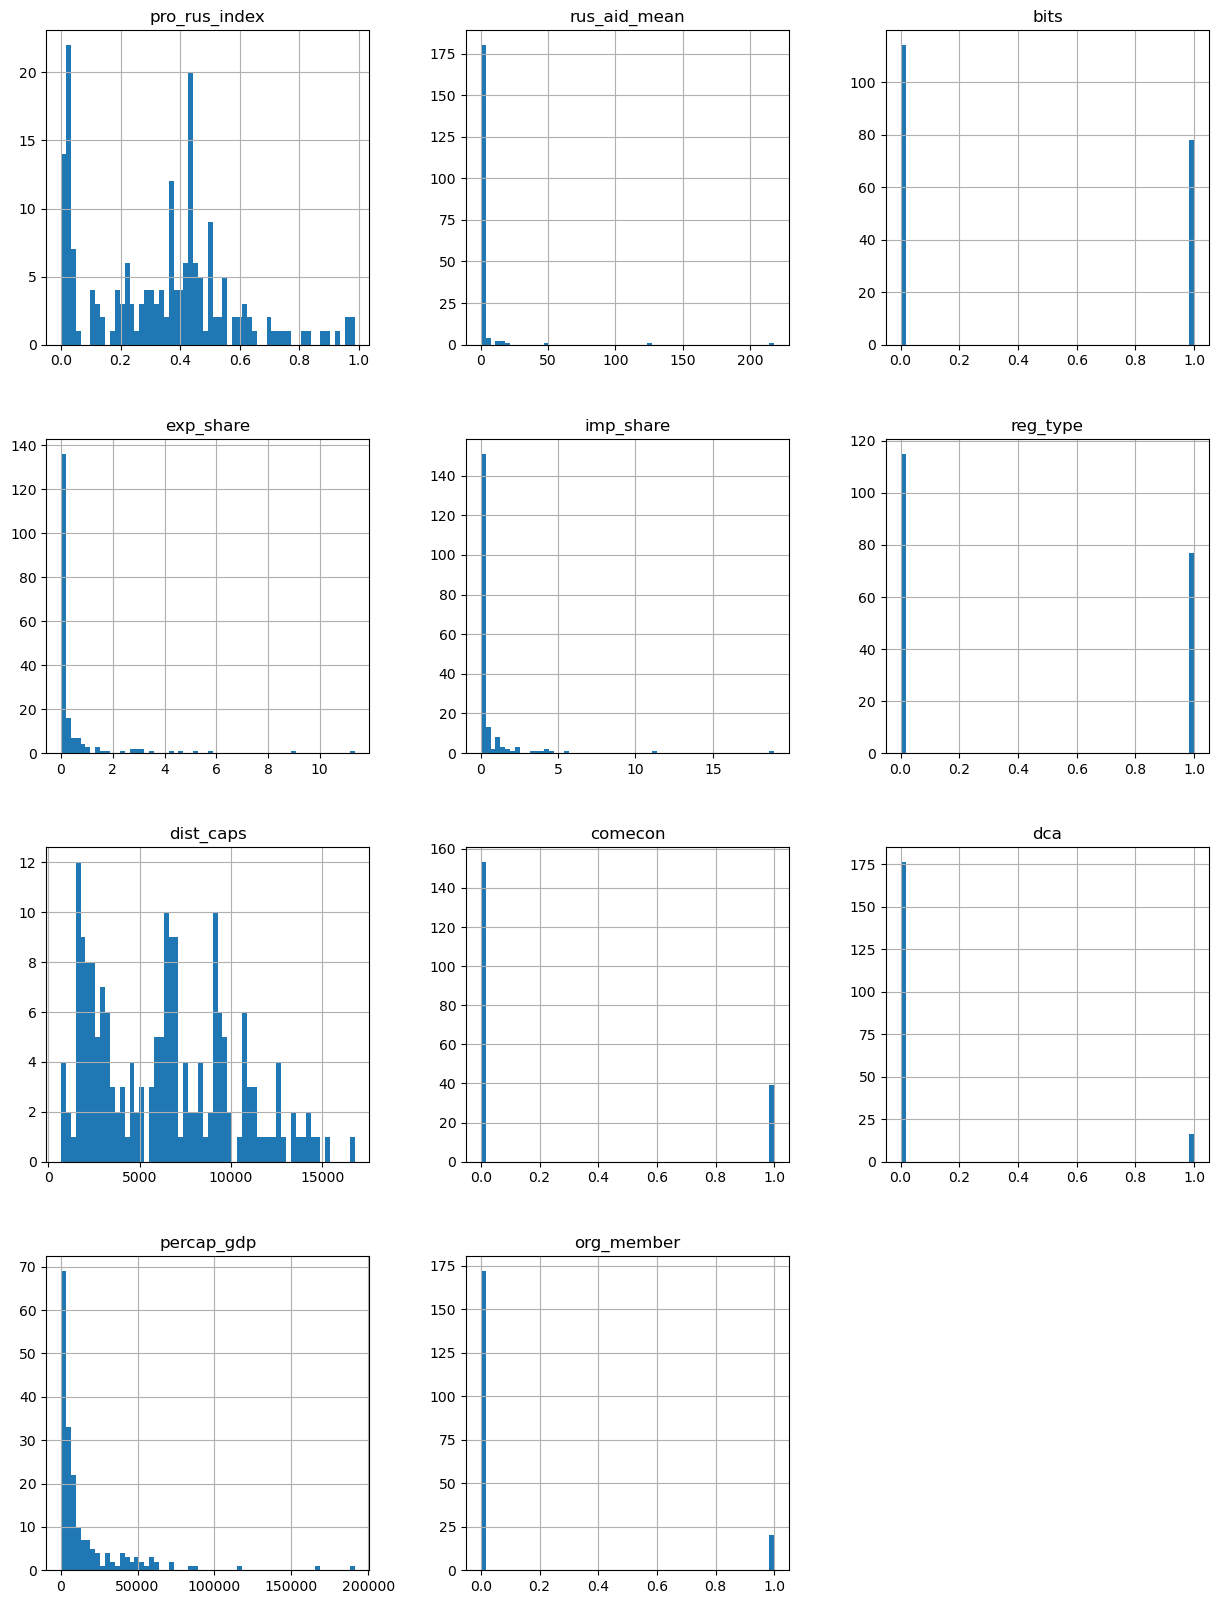

In [321]:
# Creating histograms for each numerical column
df_orig.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);
# Based on histogram target variable "pro_rus_index" is not normally distributed

In [322]:
# Testing normality using Shapiro-Wilk test (known to be more appropriate for smaller sample sizes compared to the K-S test)
from scipy import stats
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df_orig['pro_rus_index'])
shapiro_test_statistic, shapiro_p_value

(0.9368934722230662, 2.0214138436840187e-07)

In [323]:
# print the test result
if shapiro_p_value < 0.05:
    print('The test results indicate that the distribution is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution is not significantly different from a normal distribution.')

The test results indicate that the distribution is significantly different from a normal distribution.


**Conclusion that target variable Pro Russian Voting Index not normally distibuted and need to transform it!** 

C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (192). n_quantiles is set to n_samples.
  warnings.warn(


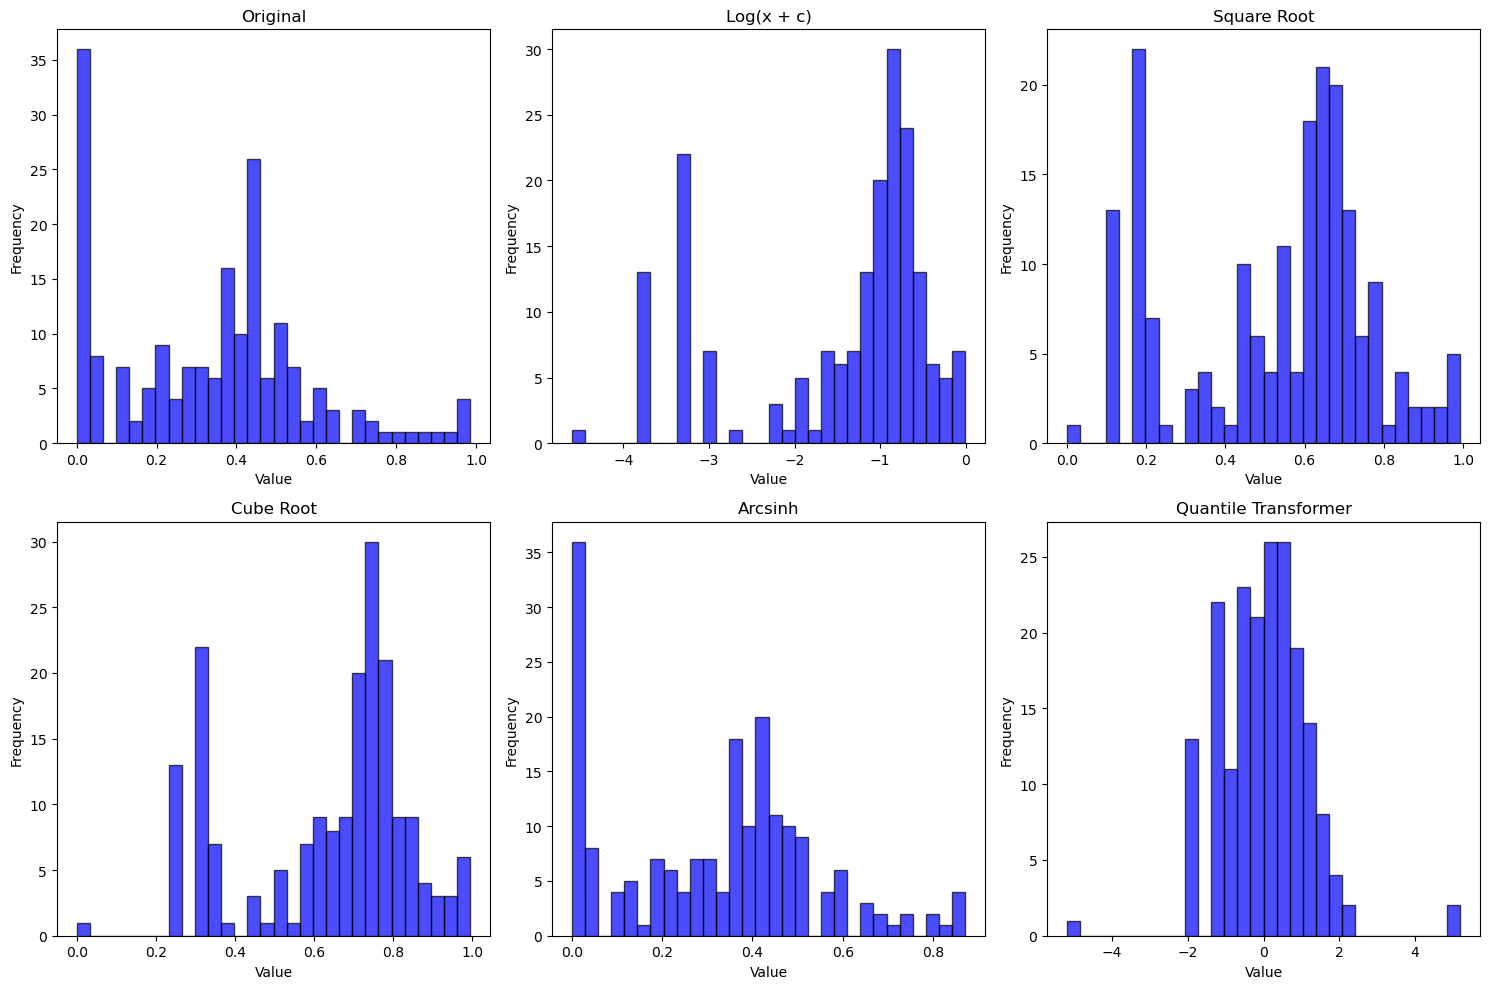

In [325]:
# Python Code to Compare Transformations

from sklearn.preprocessing import QuantileTransformer

# Define target variable
y = df_orig["pro_rus_index"]

# Apply different transformations
c = 0.01  # Small constant for log transformation
y_log = np.log(y + c)
y_sqrt = np.sqrt(y)
y_cbrt = np.cbrt(y)
y_arcsinh = np.arcsinh(y)

# Apply Quantile Transformer
qt = QuantileTransformer(output_distribution="normal")
y_quantile = qt.fit_transform(y.values.reshape(-1, 1)).flatten()

# Plot histograms for each transformation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

transformations = {
    "Original": y,
    "Log(x + c)": y_log,
    "Square Root": y_sqrt,
    "Cube Root": y_cbrt,
    "Arcsinh": y_arcsinh,
    "Quantile Transformer": y_quantile
}

for ax, (name, transformed_y) in zip(axes, transformations.items()):
    ax.hist(transformed_y, bins=30, alpha=0.7, color="blue", edgecolor="black")
    ax.set_title(name)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Quantile Transformer seems to be best solution for normal distribution!

#### 2. Bi-and Multivariate EDA (Visualisations in Python)

In [328]:
df_orig.groupby('reg_type')['pro_rus_index'].mean()
# authoritarian countries on average have a 0.28 points higher pro-Russian voting index than democracies 

reg_type
0    0.221491
1    0.508582
Name: pro_rus_index, dtype: float64

### **Feature Selection**

In [331]:
df_orig

,un_member,code,pro_rus_index,rus_aid_mean,bits,exp_share,imp_share,reg_type,dist_caps,comecon,dca,percap_gdp,org_member
0,Afghanistan,AFG,0.414286,1.775556,0,0.080393,0.004357,1,3368,1,0,508,0
1,Albania,ALB,0.000000,0.085556,1,0.021221,0.005829,0,2064,1,0,5077,0
2,Algeria,DZA,0.528571,0.005556,1,0.617429,0.009579,1,3341,0,0,4973,0
3,Andorra,AND,0.014286,0.000000,0,0.001125,0.000079,0,2973,0,0,44124,0
4,Angola,AGO,0.514286,0.703333,1,0.029179,0.001886,1,7536,1,0,3141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,"Venezuela, Bolivarian Republic of",VEN,0.828571,0.007778,1,0.131671,0.000836,1,9940,0,1,8932,0
188,Viet Nam,VNM,0.714286,1.718889,1,0.324850,1.016279,1,6738,0,0,2823,0
189,Yemen,YEM,0.357143,1.084444,1,0.051243,0.000086,1,4526,0,0,1010,0
190,Zambia,ZMB,0.385714,3.767778,0,0.002343,0.004957,0,7976,0,0,1408,0


In [332]:
# Creating reduced dataset without non-numeric country columns
df = df_orig.drop(['un_member', 'code'],axis=1)
df

,pro_rus_index,rus_aid_mean,bits,exp_share,imp_share,reg_type,dist_caps,comecon,dca,percap_gdp,org_member
0,0.414286,1.775556,0,0.080393,0.004357,1,3368,1,0,508,0
1,0.000000,0.085556,1,0.021221,0.005829,0,2064,1,0,5077,0
2,0.528571,0.005556,1,0.617429,0.009579,1,3341,0,0,4973,0
3,0.014286,0.000000,0,0.001125,0.000079,0,2973,0,0,44124,0
4,0.514286,0.703333,1,0.029179,0.001886,1,7536,1,0,3141,0
...,...,...,...,...,...,...,...,...,...,...,...
187,0.828571,0.007778,1,0.131671,0.000836,1,9940,0,1,8932,0
188,0.714286,1.718889,1,0.324850,1.016279,1,6738,0,0,2823,0
189,0.357143,1.084444,1,0.051243,0.000086,1,4526,0,0,1010,0
190,0.385714,3.767778,0,0.002343,0.004957,0,7976,0,0,1408,0


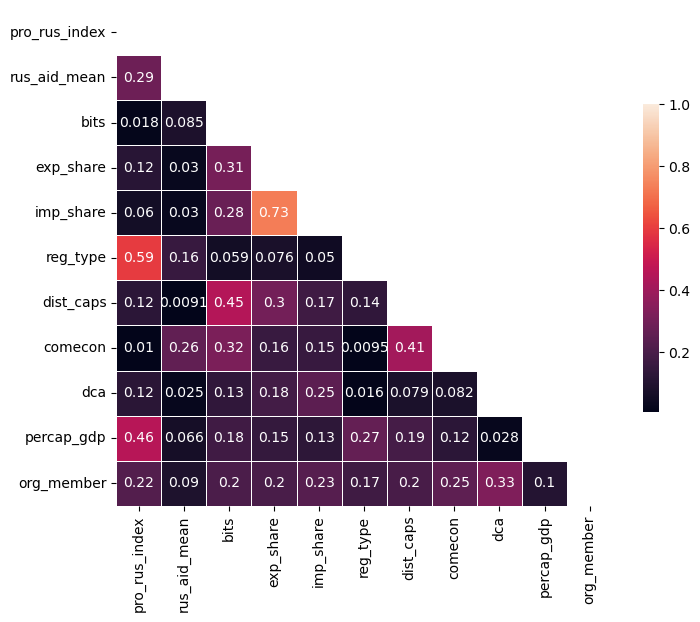

In [336]:
# Heatmap with correlations 

corr=np.abs(df.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8)) # figsize 10 good start, 8 was smallest possible 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [337]:
# 1. Drop Low-Correlation Features
correlation_matrix = df.corr()
target_corr = correlation_matrix["pro_rus_index"].abs()  # Absolute correlation with target

# Drop features with very low correlation < 0.1
low_corr_features = target_corr[target_corr < 0.1].index
df_select = df.drop(columns=low_corr_features)
df_select
# This results in the removal of the following three variables: bits, comecon, import partner share

,pro_rus_index,rus_aid_mean,exp_share,reg_type,dist_caps,dca,percap_gdp,org_member
0,0.414286,1.775556,0.080393,1,3368,0,508,0
1,0.000000,0.085556,0.021221,0,2064,0,5077,0
2,0.528571,0.005556,0.617429,1,3341,0,4973,0
3,0.014286,0.000000,0.001125,0,2973,0,44124,0
4,0.514286,0.703333,0.029179,1,7536,0,3141,0
...,...,...,...,...,...,...,...,...
187,0.828571,0.007778,0.131671,1,9940,1,8932,0
188,0.714286,1.718889,0.324850,1,6738,0,2823,0
189,0.357143,1.084444,0.051243,1,4526,0,1010,0
190,0.385714,3.767778,0.002343,0,7976,0,1408,0


In [338]:
# 2. Drop Highly Correlated Features (Multicollinearity)

# Find pairs of highly correlated features
corr_matrix = df_select.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.85
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]
df_select.drop(columns=high_corr_features, inplace=True)
df_select
# No change - in case of only pair with close to high correlation imp_partner_share and exp_partner_share with 0.73 correlation, imp_share already dropped 

,pro_rus_index,rus_aid_mean,exp_share,reg_type,dist_caps,dca,percap_gdp,org_member
0,0.414286,1.775556,0.080393,1,3368,0,508,0
1,0.000000,0.085556,0.021221,0,2064,0,5077,0
2,0.528571,0.005556,0.617429,1,3341,0,4973,0
3,0.014286,0.000000,0.001125,0,2973,0,44124,0
4,0.514286,0.703333,0.029179,1,7536,0,3141,0
...,...,...,...,...,...,...,...,...
187,0.828571,0.007778,0.131671,1,9940,1,8932,0
188,0.714286,1.718889,0.324850,1,6738,0,2823,0
189,0.357143,1.084444,0.051243,1,4526,0,1010,0
190,0.385714,3.767778,0.002343,0,7976,0,1408,0


### **Machine Learning**

#### Perform train (features/ X) and test (target/ y) split with original target variable for use in non-distance-based models

In [349]:
features = df_select.drop(columns = ["pro_rus_index"])
target = df_select["pro_rus_index"]

In [350]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

#### Creating transformed target for use in distance-based models

In [354]:
qt = QuantileTransformer(output_distribution="normal")
transformed_target = qt.fit_transform(target.to_numpy().reshape(-1, 1)).flatten()

C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (192). n_quantiles is set to n_samples.
  warnings.warn(


In [356]:
# Split with transformed target
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(features, transformed_target, test_size = 0.20, random_state=42)

#### 1. Distance-based ML models with non-normalized vs. normalized data and TRANSFORMED target variable

##### 1.1 KNN Basic

In [360]:
knn = KNeighborsRegressor(n_neighbors=5)

In [362]:
knn.fit(X_train_tf, y_train_tf)

KNeighborsRegressor()

In [363]:
knn.score(X_test_tf, y_test_tf)
# 0.2900990856593273 with random state = 42

0.2900990856593273

##### 1.2 Linear Regression Basic

In [367]:
# 1. Initializing
lin_reg_basic = LinearRegression()

In [369]:
# 2. Fitting
lin_reg_basic.fit(X_train_tf, y_train_tf)

LinearRegression()

In [371]:
# 3. Predicting 
pred_lin_basic_tf = lin_reg_basic.predict(X_test_tf)
pred_lin_basic_tf

array([ 1.12865076, -0.31347667, -1.33018517, -0.45762406, -0.36143731,
       -0.0256643 ,  0.76084739, -0.26737962, -1.13570666, -1.22337442,
        0.14548839, -3.13245163, -0.26697783, -1.110418  , -0.23105936,
        0.74277566, -0.25710447, -0.14124777, -0.11225178, -0.26180309,
        0.75429036, -0.13624953,  0.78694705, -3.08362017, -0.74704629,
        0.63434662,  0.30702711,  0.75412351, -1.19078492, -0.61083728,
       -0.54198958, -1.73419899,  0.67308261,  0.03695353, -0.102277  ,
       -0.4169966 , -0.09832461,  0.75843078, -1.32348286])

In [373]:
# Back-transform predictions to original scale
pred_original = qt.inverse_transform(pred_lin_basic_tf.reshape(-1, 1)).flatten()

print("Transformed Predictions:", pred_lin_basic_tf)
print("Back-transformed Predictions:", pred_original)

Transformed Predictions: [ 1.12865076 -0.31347667 -1.33018517 -0.45762406 -0.36143731 -0.0256643
  0.76084739 -0.26737962 -1.13570666 -1.22337442  0.14548839 -3.13245163
 -0.26697783 -1.110418   -0.23105936  0.74277566 -0.25710447 -0.14124777
 -0.11225178 -0.26180309  0.75429036 -0.13624953  0.78694705 -3.08362017
 -0.74704629  0.63434662  0.30702711  0.75412351 -1.19078492 -0.61083728
 -0.54198958 -1.73419899  0.67308261  0.03695353 -0.102277   -0.4169966
 -0.09832461  0.75843078 -1.32348286]
Back-transformed Predictions: [0.55405077 0.27142857 0.02857143 0.21428571 0.24285714 0.37142857
 0.49050778 0.28571429 0.02857143 0.02857143 0.39352766 0.00236503
 0.28571429 0.02857143 0.3        0.47567896 0.28571429 0.32532696
 0.34235101 0.28571429 0.48515069 0.32857143 0.5        0.00278994
 0.07668149 0.45714286 0.42857143 0.48501403 0.02857143 0.14285714
 0.18571429 0.01428571 0.47142857 0.37142857 0.34285714 0.22857143
 0.34314169 0.48853651 0.02857143]


In [375]:
# 4. Evaluating (but first two measures not intuitively interpretable anymore due to transformation
print("MAE", mean_absolute_error(pred_lin_basic_tf, y_test_tf))
print("RMSE", mean_squared_error(pred_lin_basic_tf, y_test_tf, squared=False))
print("R2 score", lin_reg_basic.score(X_test_tf, y_test_tf))
# R2 score 0.3213628063236512 - with random state = 42

MAE 0.6247525999312011
RMSE 0.9879014406903484
R2 score 0.3213628063236512


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [377]:
# 5. Displaying + interpreting  coefficients
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_tf.columns, lin_reg_basic.coef_)}
lin_reg_coef

{'rus_aid_mean': 0.00742890538223689,
 'exp_share': 0.010012835715430017,
 'reg_type': 1.0125818404422795,
 'dist_caps': 3.8127147028792207e-05,
 'dca': 0.3361745731686001,
 'percap_gdp': -1.606297479397027e-05,
 'org_member': 0.2555209455261814}

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'rus_aid_mean'),
  Text(1, 0, 'exp_share'),
  Text(2, 0, 'reg_type'),
  Text(3, 0, 'dist_caps'),
  Text(4, 0, 'dca'),
  Text(5, 0, 'percap_gdp'),
  Text(6, 0, 'org_member')])

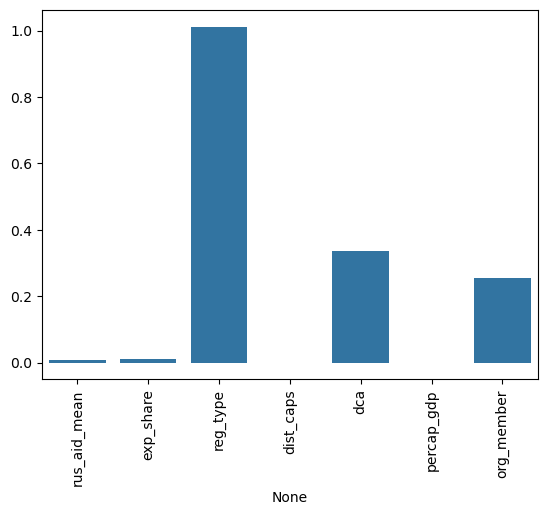

In [379]:
# 6. Visualising Coefficients
sns.barplot(x=X_train_tf.columns, y=lin_reg_coef.values()) 
plt.xticks(rotation=90)

Direct interpretation of coefficients not possible anymore due to transformation of target variable but most influential factors still visible: regime type, org member 

In [382]:
# Now with normalized values for comparison

In [383]:
normalizer = MinMaxScaler()

In [386]:
normalizer.fit(X_train_tf)

MinMaxScaler()

In [388]:
X_train_norm = normalizer.transform(X_train_tf)
X_test_norm = normalizer.transform(X_test_tf)

##### 1.3 KNN regressor with NORMALIZED values 

In [391]:
knn = KNeighborsRegressor(n_neighbors=5)

In [393]:
knn.fit(X_train_norm, y_train_tf)

KNeighborsRegressor()

In [395]:
knn.score(X_test_norm, y_test_tf)
# 0.5017201749488842 with random state 42

0.5017201749488842

##### 1.4 Linear Regression with normalized features 

In [398]:
# 1. Initializing
lin_reg_norm = LinearRegression()

In [400]:
# 2. Fitting
lin_reg_norm.fit(X_train_norm, y_train_tf)

LinearRegression()

In [402]:
# 3.1 Predicting
pred_lin_norm = lin_reg_norm.predict(X_test_norm)
pred_lin_norm

array([ 1.12865076, -0.31347667, -1.33018517, -0.45762406, -0.36143731,
       -0.0256643 ,  0.76084739, -0.26737962, -1.13570666, -1.22337442,
        0.14548839, -3.13245163, -0.26697783, -1.110418  , -0.23105936,
        0.74277566, -0.25710447, -0.14124777, -0.11225178, -0.26180309,
        0.75429036, -0.13624953,  0.78694705, -3.08362017, -0.74704629,
        0.63434662,  0.30702711,  0.75412351, -1.19078492, -0.61083728,
       -0.54198958, -1.73419899,  0.67308261,  0.03695353, -0.102277  ,
       -0.4169966 , -0.09832461,  0.75843078, -1.32348286])

In [404]:
# 3.2 Back-transform predictions to original scale
pred_norm_original = qt.inverse_transform(pred_lin_norm.reshape(-1, 1)).flatten()

print("Transformed Predictions:", pred_lin_norm)
print("Back-transformed Predictions:", pred_norm_original)

Transformed Predictions: [ 1.12865076 -0.31347667 -1.33018517 -0.45762406 -0.36143731 -0.0256643
  0.76084739 -0.26737962 -1.13570666 -1.22337442  0.14548839 -3.13245163
 -0.26697783 -1.110418   -0.23105936  0.74277566 -0.25710447 -0.14124777
 -0.11225178 -0.26180309  0.75429036 -0.13624953  0.78694705 -3.08362017
 -0.74704629  0.63434662  0.30702711  0.75412351 -1.19078492 -0.61083728
 -0.54198958 -1.73419899  0.67308261  0.03695353 -0.102277   -0.4169966
 -0.09832461  0.75843078 -1.32348286]
Back-transformed Predictions: [0.55405077 0.27142857 0.02857143 0.21428571 0.24285714 0.37142857
 0.49050778 0.28571429 0.02857143 0.02857143 0.39352766 0.00236503
 0.28571429 0.02857143 0.3        0.47567896 0.28571429 0.32532696
 0.34235101 0.28571429 0.48515069 0.32857143 0.5        0.00278994
 0.07668149 0.45714286 0.42857143 0.48501403 0.02857143 0.14285714
 0.18571429 0.01428571 0.47142857 0.37142857 0.34285714 0.22857143
 0.34314169 0.48853651 0.02857143]


In [405]:
# 4. Evaluating (but first two measures not intuitively interpretable anymore due to transformation
print("MAE", mean_absolute_error(pred_lin_norm, y_test_tf))
print("RMSE", mean_squared_error(pred_lin_norm, y_test_tf, squared=False))
print("R2 score", lin_reg_norm.score(X_test_norm, y_test_tf))
# normalization does not improve r²
# R2 score 0.321362806323657 with random state 42

MAE 0.6247525999311977
RMSE 0.987901440690344
R2 score 0.321362806323657


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [406]:
# 5. Displaying coefficients (use X_train instead of X_train_norm cos otherwise error and its only relevant as label/ column names so no difference for coefs 
linreg_norm_coef = {feature : coef for feature, coef in zip(X_train.columns, lin_reg_norm.coef_)}
linreg_norm_coef

{'rus_aid_mean': 1.6197655121856607,
 'exp_share': 0.11359047173214323,
 'reg_type': 1.0125818404423457,
 'dist_caps': 0.6104537510783568,
 'dca': 0.3361745731685843,
 'percap_gdp': -1.877328053095668,
 'org_member': 0.2555209455261812}

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'rus_aid_mean'),
  Text(1, 0, 'exp_share'),
  Text(2, 0, 'reg_type'),
  Text(3, 0, 'dist_caps'),
  Text(4, 0, 'dca'),
  Text(5, 0, 'percap_gdp'),
  Text(6, 0, 'org_member')])

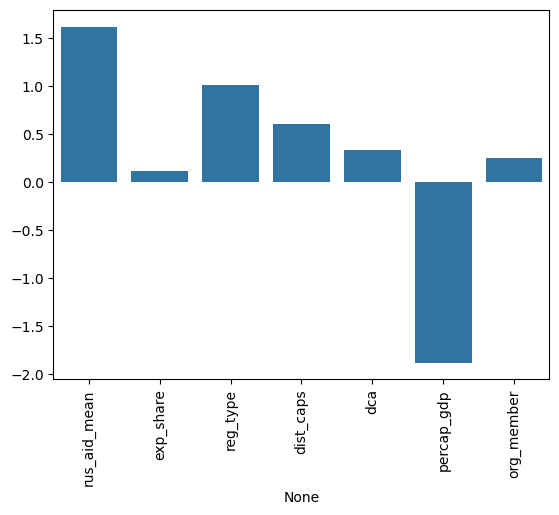

In [410]:
# 6. Visualising Coefficients
sns.barplot(x=X_train.columns, y=linreg_norm_coef.values()) 
plt.xticks(rotation=90)
# in order of highest effect on target 1. GDP per capita, 2. Russian ODA, 3. Regime type 

#### 2. Decision Tree (without target transformation and features normalization)

In [429]:
# 1. Initialize 
tree = DecisionTreeRegressor(max_depth=3)

In [431]:
# 2. Fit
tree.fit(X_train, y_train) # never use normalized/standardized values for decision tree

DecisionTreeRegressor(max_depth=3)

In [433]:
# 3. Predict 
pred = tree.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test, y_test))
# R2 score 0.6555529373238449 with random state 42

MAE 0.10902670499931706
RMSE 0.15252266376576515
R2 score 0.585025449155549


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [435]:
tree_importance = {feature : importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance
# 1. Regime type has 52% importance in explaining the target variable pro rus voting index
# 2. GDP per capita 24% importance ...  countries with a lower gdp tend to support Russia more 
# 3. Aid: 20% 
# Rest tiny numbers 
# can visualize bilateral scatterplots to get direction of relationship! 

{'rus_aid_mean': 0.19557086819546507,
 'exp_share': 0.0,
 'reg_type': 0.5236303685508148,
 'dist_caps': 0.017381071595591182,
 'dca': 0.0,
 'percap_gdp': 0.26341769165812895,
 'org_member': 0.0}

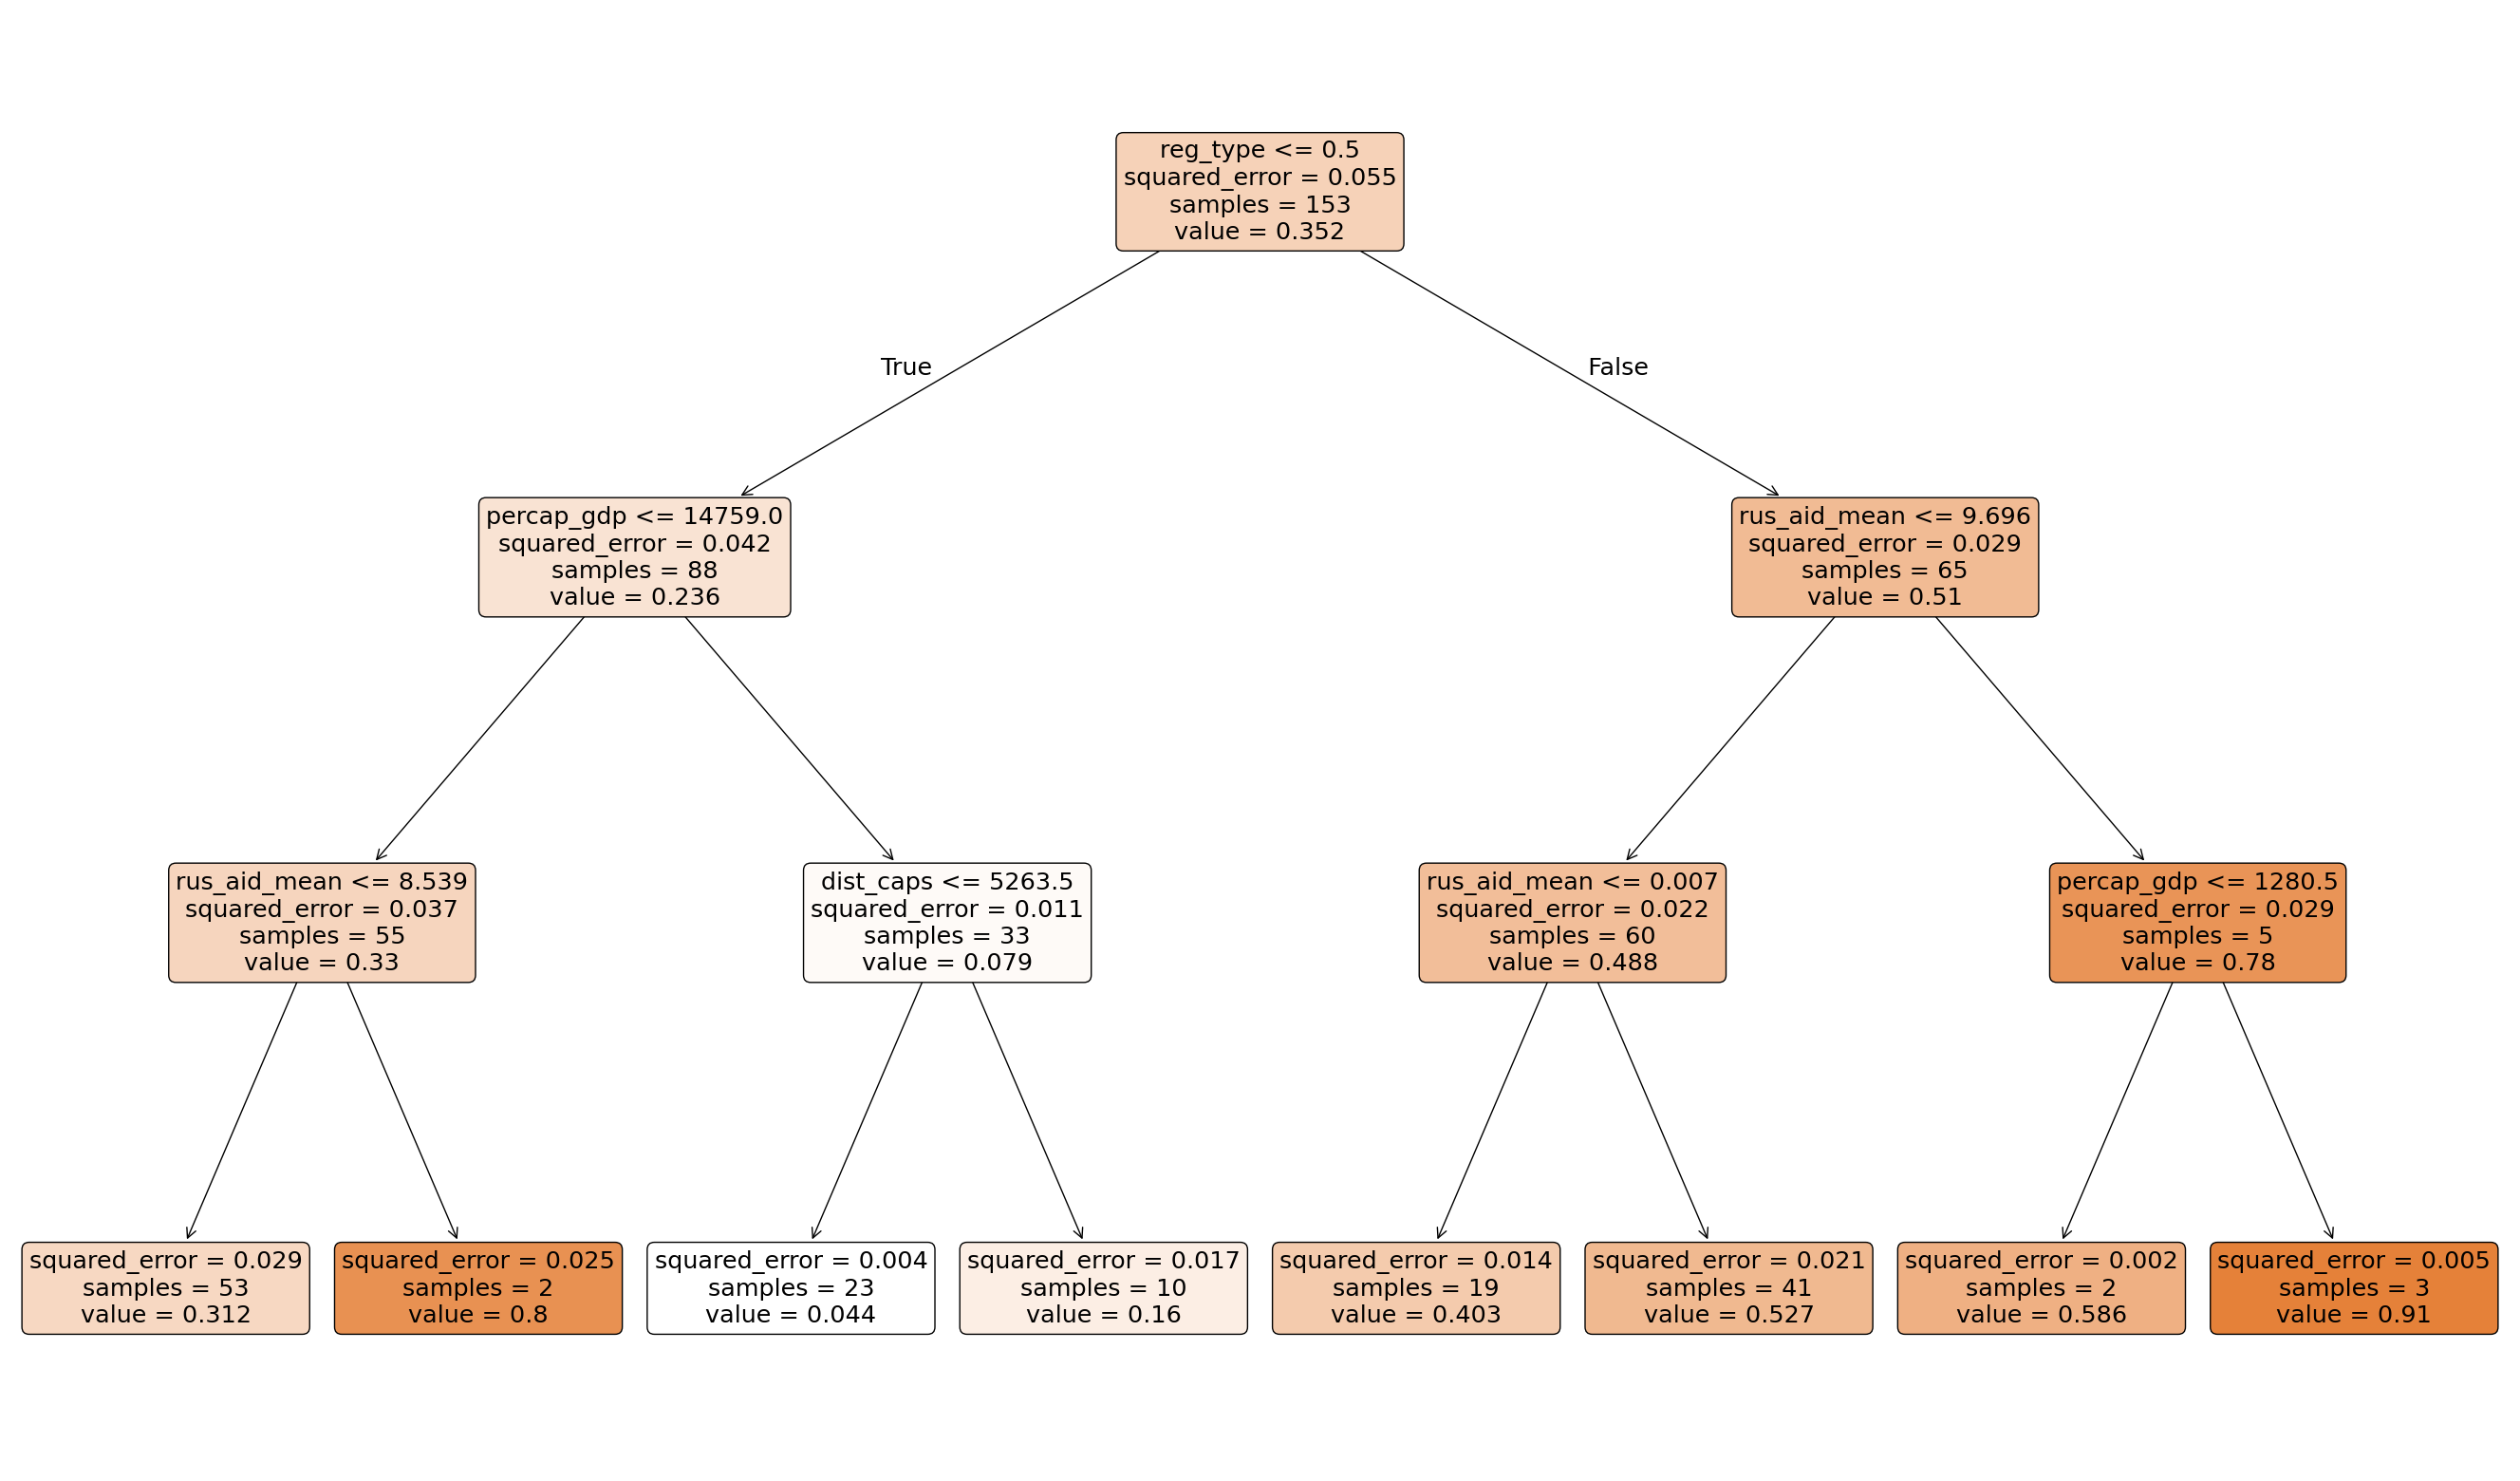

In [437]:
# Visualising tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

### 3. Ensemble Methods

#### 3.1 Random Forest

In [441]:
# Initialize
forest = RandomForestRegressor(n_estimators=100, 
                             max_depth=10)

In [443]:
# Train
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [444]:
#Evaluate
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test, y_test))
# MAE means that my prediction is on average 0.15 percentage points off from actual pro russian voting index values 
# R2 score 0.6101470103665165 (random state 42)

MAE 0.15203788254755995
RMSE 0.20813289838209542
R2 score 0.6345788482341586


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 3.2 Ada Boost

In [448]:
# Initialize
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [450]:
# Train
ada_reg.fit(X_train, y_train) 

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [451]:
pred = ada_reg.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test, y_test)) 
# R2 score 0.5428885314645144 (random state 42)

MAE 0.09460002363228169
RMSE 0.15176864186080324
R2 score 0.589118302722512


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 3.3 Gradient Boost

In [455]:
# Initialize
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [457]:
# Train 
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20)

In [459]:
# Evaluation
pred = gb_reg.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test, y_test)) 
# R2 score 0.4636375125160985 

MAE 0.11451741162128962
RMSE 0.1706820281531222
R2 score 0.48032922949401935


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Fine-Tuning

In [462]:
# Applying cross-validation and nested hyperparameter tuning for each model

In [464]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score

#### For Tree-based Models

In [471]:
# Define k-fold cross-validation (Outer CV) # k of 10 is better than 5 with my dataset size
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define models and hyperparameter grids
tree_models = {
    "Decision Tree": (DecisionTreeRegressor(), {'max_depth': [3, 5, 10, None], 
                                                'min_samples_split': [2, 5, 10]}),
    "Random Forest": (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 
                                                'max_depth': [None, 10, 20], 
                                                'min_samples_split': [2, 5, 10]}),
    "AdaBoost": (AdaBoostRegressor(), {'n_estimators': [50, 100, 200], 
                                       'learning_rate': [0.01, 0.1, 1]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 
                                                        'max_depth': [3, 5, 10], 
                                                        'learning_rate': [0.01, 0.1, 0.2]})
}

# Define scoring metric (R²)
scorer = make_scorer(r2_score)

# Apply Nested Cross-Validation for Each Model
for name, (model, param_grid) in tree_models.items():
    if param_grid:  # If the model has hyperparameters to tune
        model = GridSearchCV(model, param_grid, cv=3, scoring=scorer, n_jobs=-1)  # Inner CV - GridSearchCV runs a 3-fold CV internally to find the best hyperparameters

    cv_scores = cross_val_score(model, features, target, cv=kf, scoring='r2')  # Outer CV - Evaluates models using the best hyperparameters and the defined kf
    print(f"{name}: Mean R² = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

#Decision Tree: Mean R² = 0.3633, Std = 0.1372
# Random Forest: Mean R² = 0.5579, Std = 0.1203
# AdaBoost: Mean R² = 0.5325, Std = 0.1384
# Gradient Boosting: Mean R² = 0.5093, Std = 0.1205

Decision Tree: Mean R² = 0.3633, Std = 0.1372
Random Forest: Mean R² = 0.5579, Std = 0.1203
AdaBoost: Mean R² = 0.5325, Std = 0.1384
Gradient Boosting: Mean R² = 0.5093, Std = 0.1205


#### For Distance-Based Models (using transformed target instead of original one)

In [473]:
from sklearn.pipeline import Pipeline

# Define k-fold cross-validation (Outer CV) # k of 10 is better than 5 with my dataset size
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define models and hyperparameter grids
distance_models = {
    "Linear Regression": (LinearRegression(), None),
    "KNN": (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7, 9]})
}

# Define scoring metric (R²)
scorer = make_scorer(r2_score)

# Apply Nested Cross-Validation for Each Model
for name, (model, param_grid) in distance_models.items():
    # Create a pipeline with MinMaxScaler for normalization
    pipeline_steps = [('scaler', MinMaxScaler())]  # MinMax normalization step
    
    # If model has hyperparameters to tune, include GridSearchCV
    if param_grid:  
        model = GridSearchCV(model, param_grid, cv=3, scoring=scorer, n_jobs=-1)  # Inner CV
        pipeline_steps.append(('model', model))  # Add model to pipeline
    else:
        pipeline_steps.append(('model', model))  # No hyperparameter tuning, just add model to pipeline
    
    # Create the pipeline with normalization and model
    pipeline = Pipeline(steps=pipeline_steps)
    
    # Perform Cross-Validation (Outer CV)
    cv_scores = cross_val_score(pipeline, features, transformed_target, cv=kf, scoring='r2')
    
    print(f"{name}: Mean R² = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

Linear Regression: Mean R² = 0.2877, Std = 0.2583
KNN: Mean R² = 0.4266, Std = 0.2355


#### Best Model = Random Forest 

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest: Mean R² = 0.5611, Std = 0.1118
        Feature  Importance
0  rus_aid_mean    0.353980
3     dist_caps    0.205988
2      reg_type    0.200776
5    percap_gdp    0.184410
1     exp_share    0.035334
4           dca    0.017301
6    org_member    0.002212


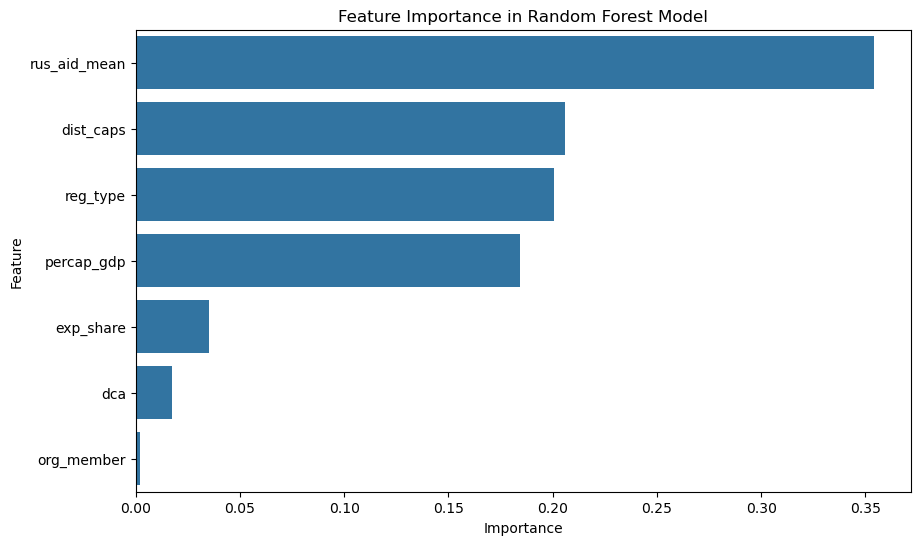

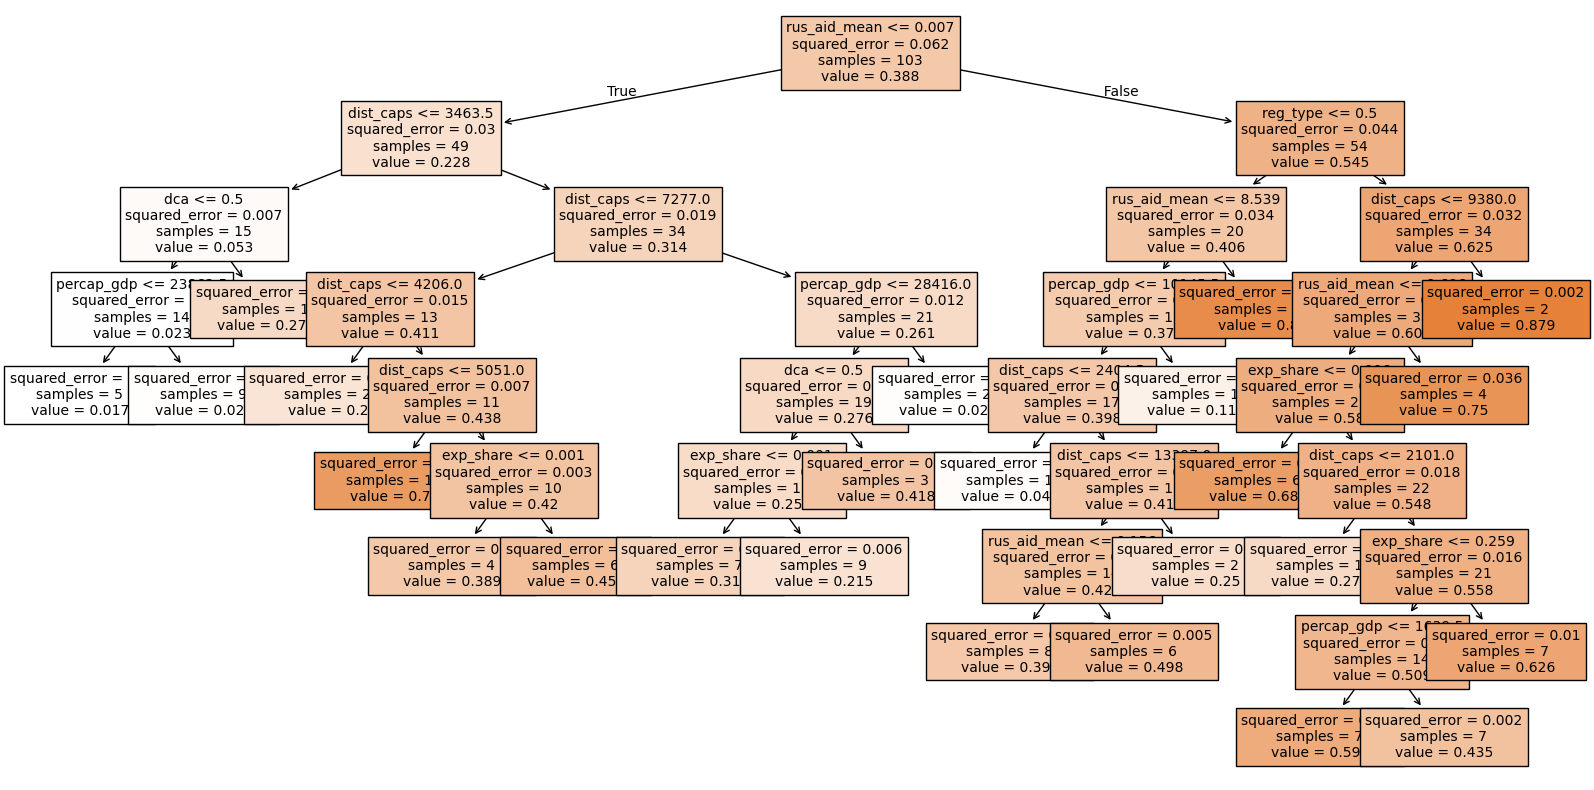

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define k-fold cross-validation (outer CV with k=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the scorer (R²)
scorer = 'r2'

# Perform GridSearchCV to tune the Random Forest hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring=scorer, n_jobs=-1)  # Inner CV

# Fit GridSearchCV on the entire dataset to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Access the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Now, perform cross-validation with the best Random Forest model
# Use the best hyperparameters to refit the model on the entire dataset
best_rf_model = grid_search.best_estimator_

# Perform outer cross-validation
cv_scores = cross_val_score(best_rf_model, features, target, cv=kf, scoring=scorer)

print(f"Random Forest: Mean R² = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

# Fit the best model on the entire dataset (optional, if needed)
best_rf_model.fit(X_train, y_train)

# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Prepare feature importances
feature_names = features.columns  # Assuming X is a pandas DataFrame with column names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Visualize one tree from the random forest (index 0, for example)
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=feature_names, fontsize=10)
plt.show()

In [ ]:
# Define the new feature names (labels)
feature_labels = {
    'Russian Aid': 'Russian Aid',
    'Distance Moscow': 'Distance Moscow',
    'Regime Type': 'Regime Type',
    'GDP Per Capita': 'GDP Per Capita',
    'Export Partner Share': 'Export Partner Share',
    'Defense Cooperation Agreement': 'Defense Cooperation Agreement',
    'Organisation Member': 'Organisation Member'
}

# Replace the original feature names with the corresponding labels
feature_labels = list(feature_labels.values())  # List of labels

# Assuming feature_names is a list of original feature names
# If the original feature names are still the same order, this will work directly
importance_df['Feature'] = importance_df['Feature'].map(lambda x: feature_labels[features.columns.tolist().index(x)])

# Plot the feature importances with updated labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest: Mean R² = 0.5611, Std = 0.1118